In [1]:
import json 
import numpy as np 
import pandas as pd 

In [112]:
def extract_run(results_json, tau): 
    extract = [x for x in results_json if x['train_tau'] == tau]
    return extract

In [169]:
def aggregate_runs(results_json): 
    # adding in evaluation results. 
    # keep in mind that the evaluation distribution is evenly weighted. 
    eval_json = {}
    taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
    for tau in taus: 
        eval_json[str(tau)] = {}
        eval_json[str(tau)]['mean_f1'] =  np.mean([x[str(tau)]['mean_f1'] for x in results_json])
        
        class_f1s = [x[str(tau)]['class_f1s'] for x in results_json]
        eval_json[str(tau)]['class_f1s'] = np.mean(class_f1s, axis=0)
        
        precisions = [x[str(tau)]['class_precisions'] for x in results_json]
        eval_json[str(tau)]['class_precisions'] = np.mean(precisions, axis=0)
        
        recalls = [x[str(tau)]['class_recalls'] for x in results_json]
        eval_json[str(tau)]['class_recalls'] = np.mean(recalls, axis=0)

    return eval_json 

# -------------------------------------------------

In [107]:
pwd

'/Users/taesoodaniellee/Documents/heaviside/multiclass_src/notebooks'

In [121]:
results_path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/results"
output_file = "eval_results.json"
fp = "/".join([results_path, output_file])
with open(fp, "r+") as f: 
    results = json.load(f)
    print(len(results))

17


In [122]:
run_list = [x['run_name'] for x in results if 'run_name' in x]

In [170]:
approx_results_0_1 = extract_run(results, tau=0.1)
approx_results_0_1_agg = aggregate_runs(approx_results_0_1)

approx_results_0_2 = extract_run(results, tau=0.2)
approx_results_0_2_agg = aggregate_runs(approx_results_0_2)

approx_results_0_3 = extract_run(results, tau=0.3)
approx_results_0_3_agg = aggregate_runs(approx_results_0_3)

approx_results_0_5 = extract_run(results, tau=0.5)
approx_results_0_5_agg = aggregate_runs(approx_results_0_5)

approx_results_0_7 = extract_run(results, tau=0.7)
approx_results_0_7_agg = aggregate_runs(approx_results_0_7)

In [130]:
# look at precisions for each trained threshold 

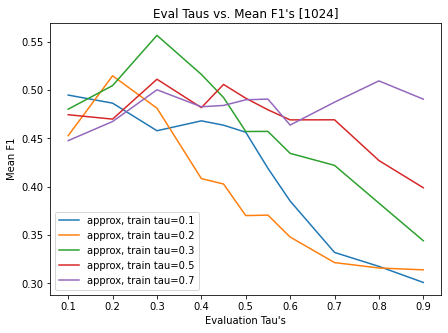

In [171]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
imb_eval_res = approx_results_0_1_agg
imb_mean_f1s = [imb_eval_res[x]['mean_f1'] for x in ce_eval_res]
plt.plot(taus, imb_mean_f1s, label="approx, train tau=0.1")

imb_eval_res = approx_results_0_2_agg
imb_mean_f1s = [imb_eval_res[x]['mean_f1'] for x in ce_eval_res]
plt.plot(taus, imb_mean_f1s, label="approx, train tau=0.2")

imb_eval_res = approx_results_0_3_agg
imb_mean_f1s = [imb_eval_res[x]['mean_f1'] for x in ce_eval_res]
plt.plot(taus, imb_mean_f1s, label="approx, train tau=0.3")

imb_eval_res = approx_results_0_5_agg
imb_mean_f1s = [imb_eval_res[x]['mean_f1'] for x in ce_eval_res]
plt.plot(taus, imb_mean_f1s, label="approx, train tau=0.5")

imb_eval_res = approx_results_0_7_agg
imb_mean_f1s = [imb_eval_res[x]['mean_f1'] for x in ce_eval_res]
plt.plot(taus, imb_mean_f1s, label="approx, train tau=0.7")


plt.title("Eval Taus vs. Mean F1's [1024]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Mean F1")
plt.legend()
plt.show()

In [172]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
classes = [x for x in range(1, 11)]

In [179]:
    
def plot_heatmap(class_prec, class_recall, class_f1, class_val):
    train_taus = [0.1, 0.2, 0.3, 0.5, 0.7]
    eval_taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
    
    ax = sns.heatmap(class_prec, annot=True)
    ax.set(xlabel="eval tau", ylabel="train tau")
    ax.set_xticklabels(eval_taus)
    ax.set_yticklabels(train_taus)
    plt.gcf().suptitle("Precision at different train taus: CLASS {}".format(class_val))
    plt.show()

    # recall 
    ax = sns.heatmap(class_recall, annot=True)
    ax.set(xlabel="eval tau", ylabel="train tau")
    ax.set_xticklabels(eval_taus)
    ax.set_yticklabels(train_taus)
    plt.gcf().suptitle("Recall at different train taus: CLASS {}".format(class_val))
    plt.show()

    ax = sns.heatmap(class_f1, annot=True)
    ax.set(xlabel="eval tau", ylabel="train tau")
    ax.set_xticklabels(eval_taus)
    ax.set_yticklabels(train_taus)
    plt.gcf().suptitle("F1 at different train taus: CLASS {}".format(class_val))
    plt.show()

In [180]:
def get_class_results(class_prec, class_recall, class_f1s, class_value): 
    class_val = class_value - 1
    # eval_taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
    for eval_tau in approx_results_0_1_agg:     
        class_prec[0].append(approx_results_0_1_agg[eval_tau]['class_precisions'][class_val])
        class_recall[0].append(approx_results_0_1_agg[eval_tau]['class_recalls'][class_val])
        class_f1s[0].append(approx_results_0_1_agg[eval_tau]['class_f1s'][class_val])

    for eval_tau in approx_results_0_2_agg:     
        class_prec[1].append(approx_results_0_2_agg[eval_tau]['class_precisions'][class_val])
        class_recall[1].append(approx_results_0_2_agg[eval_tau]['class_recalls'][class_val])
        class_f1s[1].append(approx_results_0_2_agg[eval_tau]['class_f1s'][class_val])
    
    for eval_tau in approx_results_0_3_agg:     
        class_prec[2].append(approx_results_0_3_agg[eval_tau]['class_precisions'][class_val])
        class_recall[2].append(approx_results_0_3_agg[eval_tau]['class_recalls'][class_val])
        class_f1s[2].append(approx_results_0_3_agg[eval_tau]['class_f1s'][class_val])

    for eval_tau in approx_results_0_5_agg:     
        class_prec[3].append(approx_results_0_5_agg[eval_tau]['class_precisions'][class_val])
        class_recall[3].append(approx_results_0_5_agg[eval_tau]['class_recalls'][class_val])
        class_f1s[3].append(approx_results_0_5_agg[eval_tau]['class_f1s'][class_val])

    for eval_tau in approx_results_0_7_agg:     
        class_prec[4].append(approx_results_0_7_agg[eval_tau]['class_precisions'][class_val])
        class_recall[4].append(approx_results_0_7_agg[eval_tau]['class_recalls'][class_val])
        class_f1s[4].append(approx_results_0_7_agg[eval_tau]['class_f1s'][class_val])
    return class_prec, class_recall, class_f1s

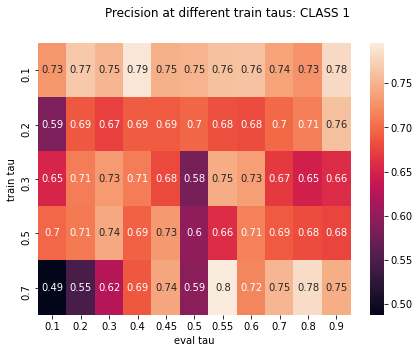

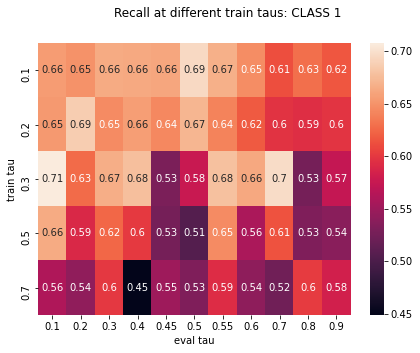

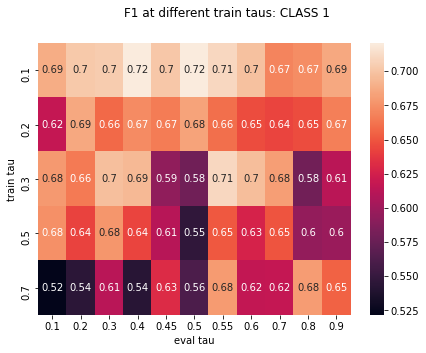

In [181]:
class_1_prec, class_1_recall, class_1_f1s = [[], [], [], [], []], [[], [], [], [], []],  [[], [], [], [], []]
class_1_prec, class_1_recall, class_1_f1s = get_class_results(class_1_prec, class_1_recall, class_1_f1s, 1)
plot_heatmap(class_1_prec, class_1_recall, class_1_f1s, class_val=1)

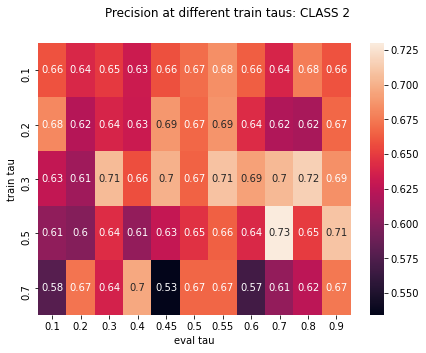

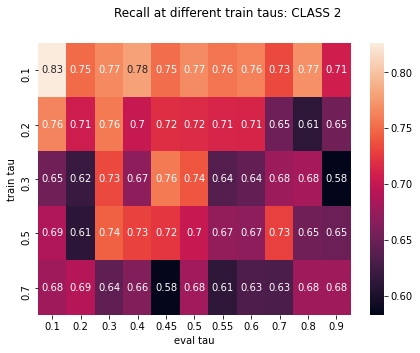

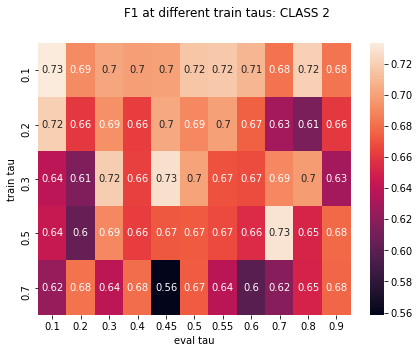

In [182]:
class_2_prec, class_2_recall, class_2_f1s =[[], [], [], [], []], [[], [], [], [], []],  [[], [], [], [], []]
class_2_prec, class_2_recall, class_2_f1s = get_class_results(class_2_prec, class_2_recall, class_2_f1s, 2)
plot_heatmap(class_2_prec, class_2_recall, class_2_f1s, class_val=2)

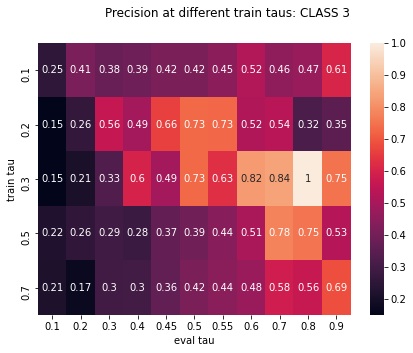

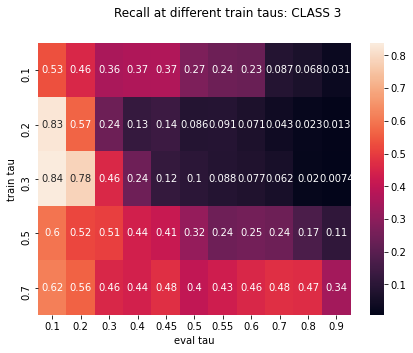

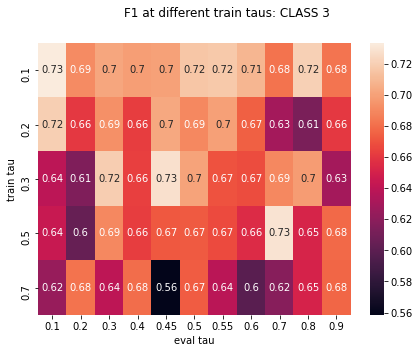

In [183]:
class_3_prec, class_3_recall, class_3_f1s = [[], [], [], [], []], [[], [], [], [], []],  [[], [], [], [], []]
class_3_prec, class_3_recall, class_3_f1s = get_class_results(class_3_prec, class_3_recall, class_3_f1s, 3)
plot_heatmap(class_3_prec, class_3_recall, class_2_f1s, class_val=3)

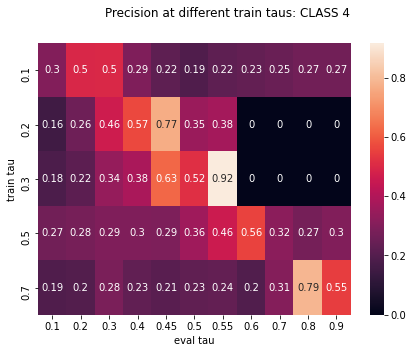

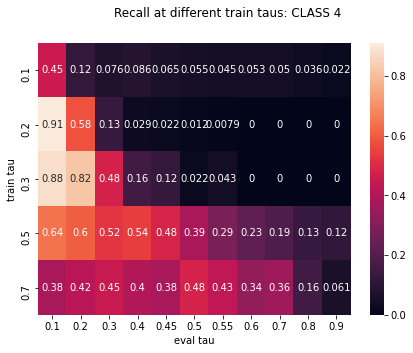

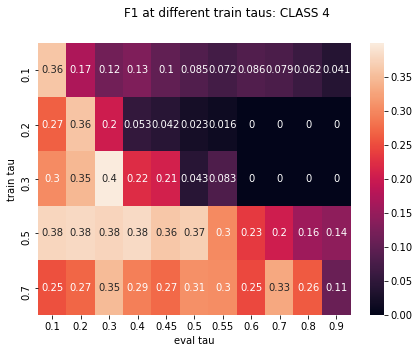

In [184]:
class_4_prec, class_4_recall, class_4_f1s = [[], [], [], [], []], [[], [], [], [], []],  [[], [], [], [], []]
class_4_prec, class_4_recall, class_4_f1s = get_class_results(class_4_prec, class_4_recall, class_4_f1s, 4)
plot_heatmap(class_4_prec, class_4_recall, class_4_f1s, class_val=4)

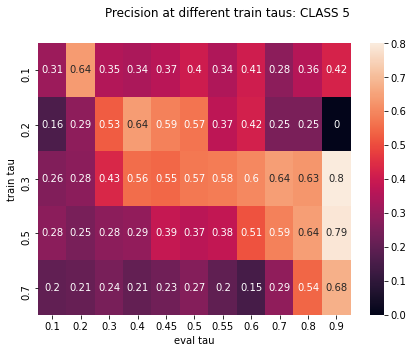

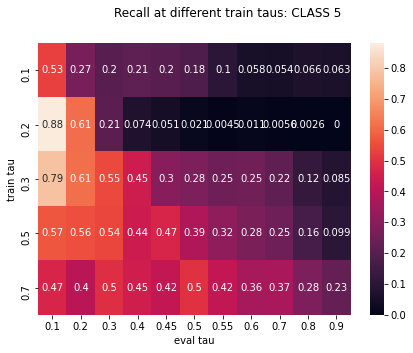

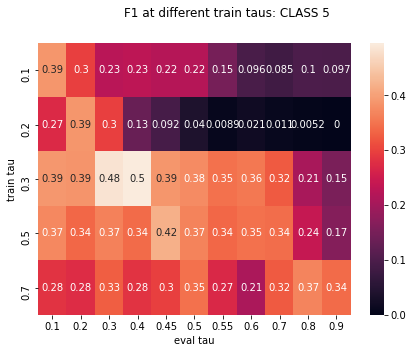

In [185]:
class_5_prec, class_5_recall, class_5_f1s = [[], [], [], [], []], [[], [], [], [], []],  [[], [], [], [], []]
class_5_prec, class_5_recall, class_5_f1s = get_class_results(class_5_prec, class_5_recall, class_5_f1s, 5)
plot_heatmap(class_5_prec, class_5_recall, class_5_f1s, class_val=5)

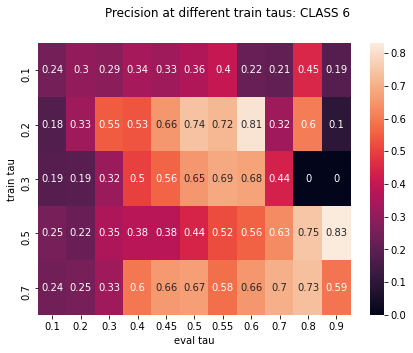

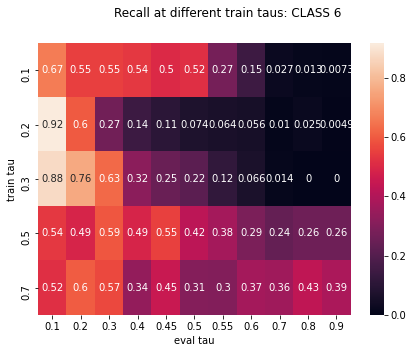

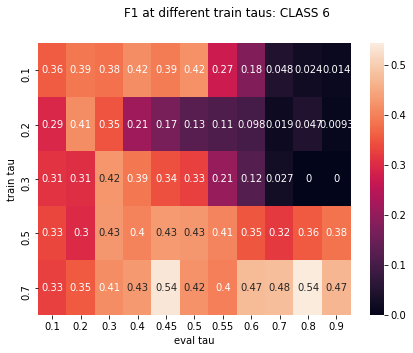

In [186]:
class_6_prec, class_6_recall, class_6_f1s = [[], [], [], [], []], [[], [], [], [], []],  [[], [], [], [], []]
class_6_prec, class_6_recall, class_6_f1s = get_class_results(class_6_prec, class_6_recall, class_6_f1s, 6)
plot_heatmap(class_6_prec, class_6_recall, class_6_f1s, class_val=6)

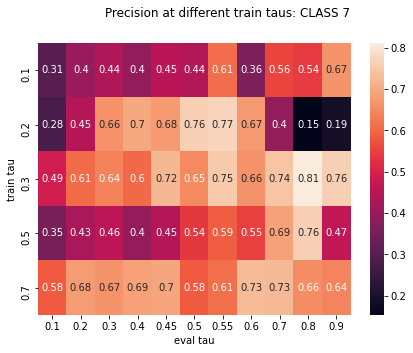

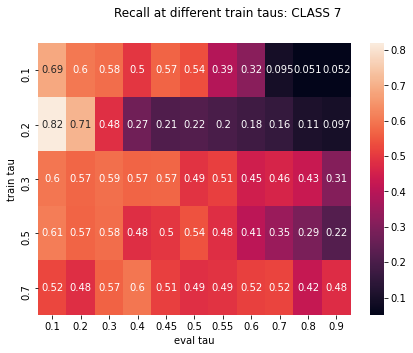

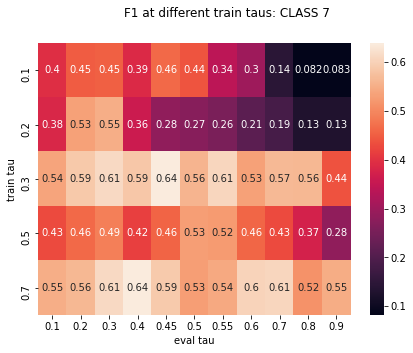

In [187]:
class_7_prec, class_7_recall, class_7_f1s = [[], [], [], [], []], [[], [], [], [], []],  [[], [], [], [], []]
class_7_prec, class_7_recall, class_7_f1s = get_class_results(class_7_prec, class_7_recall, class_7_f1s, 7)
plot_heatmap(class_7_prec, class_7_recall, class_7_f1s, class_val=7)

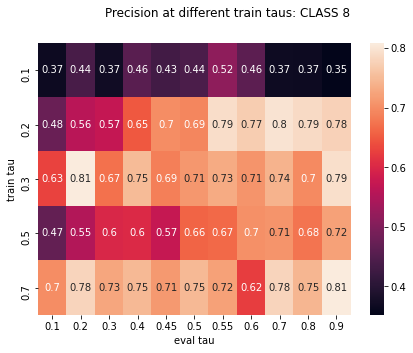

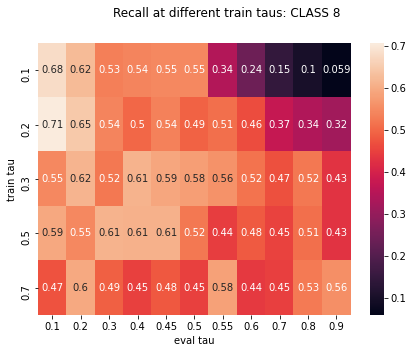

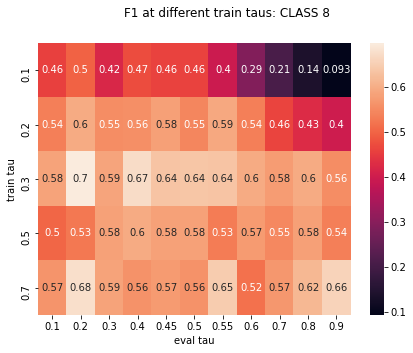

In [188]:
class_8_prec, class_8_recall, class_8_f1s = [[], [], [], [], []], [[], [], [], [], []],  [[], [], [], [], []]
class_8_prec, class_8_recall, class_8_f1s = get_class_results(class_8_prec, class_8_recall, class_8_f1s, 8)
plot_heatmap(class_8_prec, class_8_recall, class_8_f1s, class_val=8)

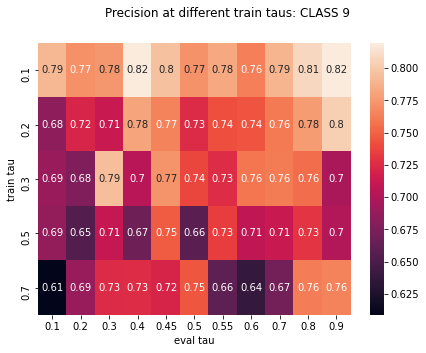

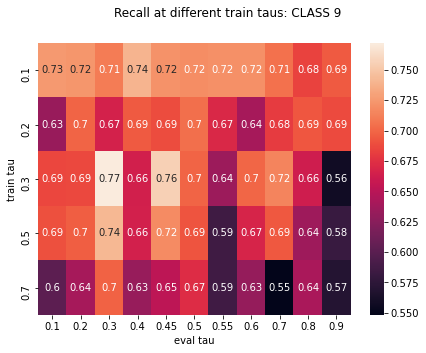

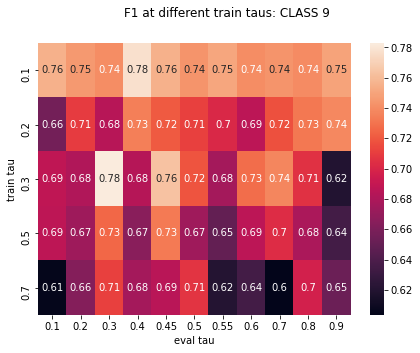

In [189]:
class_9_prec, class_9_recall, class_9_f1s = [[], [], [], [], []], [[], [], [], [], []],  [[], [], [], [], []]
class_9_prec, class_9_recall, class_9_f1s = get_class_results(class_9_prec, class_9_recall, class_9_f1s, 9)
plot_heatmap(class_9_prec, class_9_recall, class_9_f1s, class_val=9)

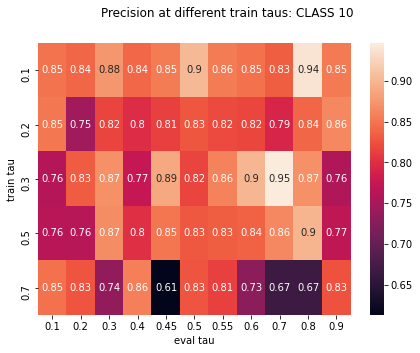

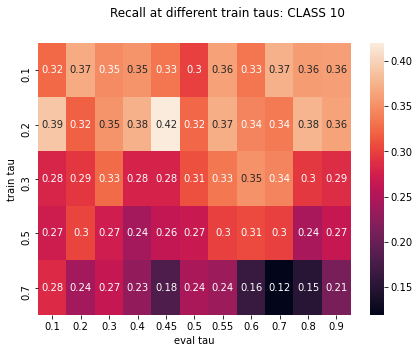

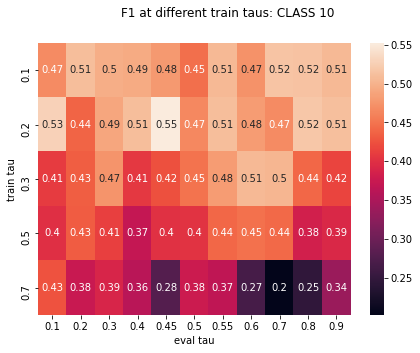

In [190]:
class_10_prec, class_10_recall, class_10_f1s = [[], [], [], [], []], [[], [], [], [], []],  [[], [], [], [], []]
class_10_prec, class_10_recall, class_10_f1s = get_class_results(class_10_prec, class_10_recall, class_10_f1s, 10)
plot_heatmap(class_10_prec, class_10_recall, class_10_f1s, class_val=10)